# Project 3 - Sentiment Analysis + Reddit Classification

This project aims to **use Pushshift's API as a form of webscraping to collect posts from two subreddits**. Then, Natural Language Processing will be applied to train a classifier to distinguish which subreddit a given post came from, which is considered as a binary classification problem. Meanwhile, a sentiment analysis will then be conducted for the exploratory data analysis.

# 1. Data import + Webscrapping from Pushshift API

In [1]:
#import the library
import requests 
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import time
%matplotlib inline


In [2]:
#Credit to Gwen Rathgeber/Ben Mathis
#subreddits = ['pokemon', 'pokemontrades']
#kind = "submission"  # we want text posts

# Establish URL base
#BASE_URL = f"https://api.pushshift.io/reddit/search/{kind}" # also known as the "API endpoint"

#last_date = datetime.datetime.utcfromtimestamp(time.time())     #utc from timestamp 
#posts = {}  #empty dictionary
#for subreddit in subreddits:
#    posts[subreddit] = []
#    day = 2                       #start with the most recent post
#    cumulative_posts = 0
#    while cumulative_posts < 15000:                           #scrape 15,000 b/c minimum is 10,000 and some will be junk from what you scrape
#        stem = f"{BASE_URL}?subreddit={subreddit}&size=100"   #part of query, #will scrape from 100 posts
#        URL = f"{stem}&after={day}d"                           #will scrape from after the day we scrape it
#        print("Querying from: " + URL)
#        try:                                                  #we use try, except b/c scraping from the web, you'll get a lot of errors
#            res = requests.get(URL)
#            assert res.status_code == 200
#            json = res.json()['data']
#            df = pd.DataFrame(json)
#            posts[subreddit].append(df)
#            cumulative_posts += df.shape[0]
#            final_date_pulled = datetime.datetime.utcfromtimestamp(df.iloc[-1, df.columns.get_loc('created_utc')])
#            increment = (last_date - final_date_pulled).days + 1
#            increment = increment if increment > 0 else 1
#            day += increment
#            last_date = final_date_pulled
#            print('successful')
#        except:
#            print(f'Scrape for {URL}, {day} failed')

#        time.sleep(2)                    #this is a delay in between scrapes

#print("Query complete!")

#thoughts_frame = pd.concat(posts['pokemon'])
#unpopular_frame = pd.concat(posts['pokemontrades'])

#thoughts_frame.to_csv('pokemon.csv')
#unpopular_frame.to_csv('pokemontrades.csv')

In [3]:
#url = 'https://api.pushshift.io/reddit/search/submission'

In [4]:
#params = {
#'subreddit': {'pokemon', 'pokemontrade'},
#'size' : 500,
#'before':1579806379
#}

In [5]:
#res = requests.get(url, params)

In [6]:
#res.status_code

In [7]:
#data = res.json()

In [8]:
#posts = data['data']

In [9]:
#len(posts)

In [10]:
#import pandas as pd

In [11]:
#df = pd.DataFrame(posts)

# 2. Data Inspection
# 2a) Inspect the 'pokemon' subreddit

In [12]:
#import the pokemon csv dataset
poke = pd.read_csv('pokemon.csv', low_memory=False)

In [13]:
#Examine the head 10 entries
poke.head()

,Unnamed: 0,all_awardings,allow_live_comments,author,author_flair_css_class,author_flair_richtext,author_flair_text,author_flair_type,author_fullname,author_is_blocked,...,author_created_utc,can_gild,content_categories,hidden,quarantine,removal_reason,subreddit_name_prefixed,brand_safe,approved_at_utc,banned_at_utc
0,0,[],False,WillJ2951,NaN,[],NaN,text,t2_8fhybe6b,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,[],False,bravosix644,NaN,[],NaN,text,t2_10m890,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,[],False,snickers0506,NaN,[],NaN,text,t2_ockunpr,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,[],False,ToadBrigade5,NaN,[],NaN,text,t2_25d9jua9,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,[],False,bravosix644,NaN,[],NaN,text,t2_10m890,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
poke.columns

Index(['Unnamed: 0', 'all_awardings', 'allow_live_comments', 'author',
       'author_flair_css_class', 'author_flair_richtext', 'author_flair_text',
       'author_flair_type', 'author_fullname', 'author_is_blocked',
       ...
       'author_created_utc', 'can_gild', 'content_categories', 'hidden',
       'quarantine', 'removal_reason', 'subreddit_name_prefixed', 'brand_safe',
       'approved_at_utc', 'banned_at_utc'],
      dtype='object', length=107)

In [15]:
#Select the columns of 'subreddit', 'selftext' and 'title' for a more detailed inspection
poke[['subreddit', 'title','selftext']].head()

,subreddit,title,selftext
0,pokemon,how does the day/night cycle work on the new g...,[removed]
1,pokemon,Is Espathra any good ? Stat and move pool wise?,[removed]
2,pokemon,Charcadet’s nature,[removed]
3,pokemon,"Toad's Daily Pokémon Ranking: Day 095, Onix",(Images are down to avoid spoilers for Scarlet...
4,pokemon,Is Esparthra any good?,[removed]


In [16]:
#Total number of posts for 'pokemon' subreddit
poke.shape

(15161, 107)

In [17]:
#Check the number of missing values for 'selftext' column
poke['selftext'].isna().sum()

7130

In [18]:
#Check the number of missing values for 'title' column
poke['title'].isna().sum()

142

# 2b) Inspect the 'pokemontrade' subreddit

In [19]:
#import the pokemontrade csv dataset
poke_trade = pd.read_csv('pokemontrades.csv', low_memory=False)

In [20]:
#Inspect the columns for pokemontrade
poke_trade.columns

Index(['Unnamed: 0', 'all_awardings', 'allow_live_comments', 'author',
       'author_flair_css_class', 'author_flair_richtext', 'author_flair_text',
       'author_flair_type', 'author_fullname', 'author_is_blocked',
       'author_patreon_flair', 'author_premium', 'awarders', 'can_mod_post',
       'contest_mode', 'created_utc', 'domain', 'full_link', 'gildings', 'id',
       'is_created_from_ads_ui', 'is_crosspostable', 'is_meta',
       'is_original_content', 'is_reddit_media_domain', 'is_robot_indexable',
       'is_self', 'is_video', 'link_flair_background_color',
       'link_flair_css_class', 'link_flair_richtext', 'link_flair_template_id',
       'link_flair_text', 'link_flair_text_color', 'link_flair_type', 'locked',
       'media_only', 'no_follow', 'num_comments', 'num_crossposts', 'over_18',
       'parent_whitelist_status', 'permalink', 'pinned', 'pwls',
       'removed_by_category', 'retrieved_on', 'score', 'selftext',
       'send_replies', 'spoiler', 'stickied', 'subre

In [21]:
#Examine the head 10 entries for poke_trade
poke_trade.head()

,Unnamed: 0,all_awardings,allow_live_comments,author,author_flair_css_class,author_flair_richtext,author_flair_text,author_flair_type,author_fullname,author_is_blocked,...,steward_reports,updated_utc,gilded,rte_mode,brand_safe,approved_at_utc,author_created_utc,banned_at_utc,media_embed,secure_media_embed
0,0,[],False,Se7enYearItch,NaN,[],NaN,text,t2_fxxxo,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,[],False,AestheticBooty,default,"[{'a': ':0:', 'e': 'emoji', 'u': 'https://emoj...",:0:SW-3569-1832-5107 || Arii (SP),richtext,t2_1wtk05v9,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,[],False,KiSsixHime,default,"[{'a': ':0:', 'e': 'emoji', 'u': 'https://emoj...",":0:5086-2995-3351 || Kissi (M), (X, αS, ΩR)",richtext,t2_idbzt,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,[],False,Juniorthej,default,"[{'a': ':0:', 'e': 'emoji', 'u': 'https://emoj...",:0:SW-3093-4339-5225 || ShadowOfYor (SCA),richtext,t2_srx7y,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,[],False,justreadinthru,default,"[{'a': ':0:', 'e': 'emoji', 'u': 'https://emoj...",:0:SW-1195-4033-5924 || JT (BD),richtext,t2_4q4hesvm,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
#Select the columns of 'subreddit', 'selftext' and 'title' for a more detailed inspection
poke_trade[['subreddit','title', 'selftext']].head(50)

,subreddit,title,selftext
0,pokemontrades,LF: Male Larvitar FT: Male Sprigatito,NaN
1,pokemontrades,LF Sprigatito and Quaxly FT Fuecoco,I have 5 eggs of Fuecoco and can hatch them if...
2,pokemontrades,FT: Sprigatito eggs LF: Quaxly and Fuecoco,I have a bunch of Sprigatito eggs I can trade ...
3,pokemontrades,Can someone gift me a Fuecoco or Spigatito ple...,"I have nothing of value to trade, I just start..."
4,pokemontrades,LF: Any Foreign Ditto FT: Gible (premier ball)...,LF: Any Foreign Ditto \nFT: Gible (premier bal...
5,pokemontrades,Anyone have any extra quaxlys?,"I really want the duck, but I don't wanna star..."
6,pokemontrades,"LF: non English ditto in SV, FT: Unused shiny ...","As title states, I have an extra code I was gi..."
7,pokemontrades,Need help completely the Pokédex! I only need ...,NaN
8,pokemontrades,Test,NaN
9,pokemontrades,[LF] any shinies [FT] Eternatus codes,I have five codes for trade.


In [23]:
#Total number of posts for 'pokemontrade' subreddit
poke_trade.shape

(15098, 85)

In [24]:
#Check the number of missing values for 'selftext' column
poke_trade['selftext'].isna().sum()

1979

In [25]:
#Check the number of missing values for 'title' column
poke_trade['title'].isna().sum()

0

# 3. Data Cleaning 

# 3a) Data cleaning for the 'pokemon' subreddit

In [26]:
#Drop the NaN values for the pokemon['title'] subreddit
poke.dropna(subset=['title'],inplace=True)

In [27]:
#Drop the NaN values for the pokemon['selftext'] subreddit
poke.dropna(subset=['selftext'],inplace=True)

In [28]:
#Remove the 'removed' entries from the posts for the pokemon subreddit
poke.drop(poke[poke.selftext == '[removed]'].index, inplace=True)

In [29]:
poke.drop(poke[poke.selftext == '[deleted]'].index, inplace=True)

In [30]:
poke.drop(poke[poke.selftext.str.contains('moderator')].index, inplace=True)

In [31]:
poke.drop(poke[poke.selftext.str.contains('removed')].index, inplace=True)

In [32]:
#Check the data shape after cleaning
poke.shape

(4705, 107)

In [33]:
#Check if there are still any missing columns
poke['title'].isna().sum()

0

In [34]:
#Check if there are still any missing columns
poke['selftext'].isna().sum()

0

# 3b) 'pokemon' DataFrame Concatenation

In [35]:
#Concatenating poke['title'] and ['selftext'] altogether
poke_text = poke[['title', 'selftext']].copy()

In [36]:
#before transforming the poke_text, it was a Series back then
type(poke_text)

pandas.core.frame.DataFrame

In [37]:
poke_text

,title,selftext
3,"Toad's Daily Pokémon Ranking: Day 095, Onix",(Images are down to avoid spoilers for Scarlet...
5,How do you nuzlocke Scarlet/Violet?,So I'm tired of the negative comments here. So...
6,No Gamefreak isn't lazy,I've been seeing a lot of people calling GF la...
8,"how to unlock ""hard mode"" in pokemon scarlet a...",Hey! I'm sure some people have figured this ou...
10,Just got my copy of Pokemon Violet today and I...,I've played a few hours so far and I think its...
...,...,...
15149,Does anyone have a ditto safari?,"I really want to start breeding, but I don't h..."
15151,A couple simple questions I just cannot find t...,"Looking to get back into the series, yadda yad..."
15152,Discussion : What are your Poke - related goal...,I'll go first! Mine is to finally get Pokemon ...
15154,im playing Y right now and i have this yet uns...,my 3ds keeps shutting off all of the sudden du...


# 3c) Data cleaning for the 'pokemontrade' subreddit

In [38]:
#Drop the NaN values for the pokemon['title'] subreddit
poke_trade.dropna(subset=['title'],inplace=True)

In [39]:
#Drop the NaN values for the pokemon['selftext'] subreddit
poke_trade.dropna(subset=['selftext'],inplace=True)

In [40]:
#Remove the 'removed' entries from the posts for the pokemon subreddit
poke_trade.drop(poke_trade[poke_trade.selftext == '[removed]'].index, inplace=True)

In [41]:
poke_trade.drop(poke_trade[poke_trade.selftext == '[deleted]'].index, inplace=True)

In [42]:
poke_trade.drop(poke_trade[poke_trade.selftext.str.contains('moderator')].index, inplace=True)

In [43]:
poke_trade.drop(poke_trade[poke_trade.selftext.str.contains('removed')].index, inplace=True)

In [44]:
#Check the data shape after cleaning
poke_trade.shape

(9215, 85)

In [45]:
poke_trade['title'].isna().sum()

0

In [46]:
#Check if there are still any missing columns
poke_trade['selftext'].isna().sum()

0

# 3d) 'pokemontrade' DataFrame Concatenation

In [47]:
poke_trade_text = poke_trade[['title', 'selftext']].copy()

In [48]:
poke_trade_text

,title,selftext
1,LF Sprigatito and Quaxly FT Fuecoco,I have 5 eggs of Fuecoco and can hatch them if...
2,FT: Sprigatito eggs LF: Quaxly and Fuecoco,I have a bunch of Sprigatito eggs I can trade ...
3,Can someone gift me a Fuecoco or Spigatito ple...,"I have nothing of value to trade, I just start..."
4,LF: Any Foreign Ditto FT: Gible (premier ball)...,LF: Any Foreign Ditto \nFT: Gible (premier bal...
5,Anyone have any extra quaxlys?,"I really want the duck, but I don't wanna star..."
...,...,...
15092,"FT: ~5IV Zygarde, 5IV Shinies, 5-6IV Naive/Jol...",[6] Happy New Year [/r/pokemontrades](http://w...
15093,LF: Someone capable of breeding pokemons in Ge...,[6]\n\n**REFERENCE:** http://www.reddit.com/r/...
15094,"FT: Giratina, Trophy Shinys, 5IVs, Happy Hour ...",[6]\n\nHey everyone! I have a few Pokemon I'm ...
15095,"LF: shiny charmander, XY","[6] Hi, I'm looking for a shiny charmander and..."


# 4. EDA 

# The number of adult users percentage in both 'pokemon' and 'pokemontrade' subreddits:

In [49]:
#Number of USERS who are adults for pokemon trades
len(poke_trade[poke_trade['over_18'] == True])/len(poke_trade)

0.09788388497015735

In [50]:
#Number of USERS who are children for pokemon trades
len(poke_trade[poke_trade['over_18'] == False])/len(poke_trade)

0.9021161150298427

In [51]:
#Number of USERS who are adults for pokemon
len(poke[poke['over_18'] == 'True'])/len(poke)

0.0017003188097768332

In [52]:
#Number of USERS who are not adults for pokemon
len(poke[poke['over_18'] == 'False'])/len(poke)

0.9982996811902232

# The Most Popular Users with the most reddit subscribers 

In [53]:
#The top author with the most subreddit subscribers for 'pokemontrade'
poke_trade.groupby(['author'])['subreddit_subscribers'].sum().sort_values(ascending=False).head(20)

author
-Shiny_Star-            11807228.0
Porygon-Bot             10919769.0
Theduskwolf              8195275.0
chenj25                  7680800.0
hoozayisdead             4543350.0
MrNoobyy                 4288371.0
ShaikhAndBake            4091363.0
enlightened_pogo         3900208.0
Joedemigod4              3739681.0
Stanley232323            3678110.0
FALLGUYS627              3432610.0
Vanhuie                  3220982.0
TheGoat1210              3215538.0
firebird5225             2874154.0
MrShinobi96              2689109.0
Beneficial-Gear-7626     2686867.0
Mikozeki                 2685718.0
Meowriisa                2685205.0
rtgreen                  2683799.0
bwo0                     2618802.0
Name: subreddit_subscribers, dtype: float64

In [54]:
#The top author with the most subreddit subscribers for 'pokemon'
poke.groupby(['author'])['subreddit_subscribers'].sum().sort_values(ascending=False).head(20)

author
EmiKoizuwumi            46068387.0
cshin09                 37484929.0
Blueeyeswhiteraichu     24890233.0
Poll_God                18683148.0
Bluecomments            16586987.0
PokeUpdateBot           16278226.0
AnonymousAzrael         16221707.0
LightBuzzyear69         15946605.0
ChrisPChicken04         15046609.0
EveningChocolate1028    14817777.0
SnowPhoenix9999         12800880.0
Under_Master_85         12598236.0
arthurcdemari           12597202.0
ChattyBird4Eva          12322406.0
blaahguy                12296105.0
wuzhere-75              12272536.0
Money-Lie7814           12246180.0
Key_Structure_2070      12242807.0
NoEnd9111               12056990.0
Nyuu222                 11885675.0
Name: subreddit_subscribers, dtype: float64

---

# Common Phrases/ Sentences in both 'pokemontrade' and ' pokemon' selftext

In [55]:
# Imports
import pandas as pd       
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import re

In [56]:
from collections import Counter

In [57]:
#Phrases / sentences that are the most common in 'pokemontrade' selftext
Counter(poke_trade['title']).most_common(15)

[('LF: Adamant natured Croagunk/toxicroak with at least 3IVs FT: inside', 62),
 ('FT: Multiple 5IVs ; LF: Offers', 31),
 ('LF: Litwik w/ Heat Wave or HA Timburr w/ egg moves. FT: HP Fire Froakie / HP Ice Helio',
  31),
 ('FT shiny clawitzer and shiny Relicanth Lf 5 iv pokes', 31),
 ('FT: 5IVs, Foregin 3-4IVs LF: 5IV Prankster Switcheroo Cottonee, Offers',
  31),
 ('LF: Non-US 5 IV (X Attack) Protean Greninja FT: Various Pokes', 31),
 ("Ft: Anyone need a chimchar? Lf: Doesn't matter.", 31),
 ('FT: 5IV/6IV, Breeding List | LF: Almost Anything &amp; Everything', 31),
 ('Gen[FT] Shiny Venusaur, Ferroseed, BarBaracle (Pokerus), Relicanth [LF] Shiny Hawlucha, Gligar, Larvitar Or Shiny Offers!',
  31),
 ('FT Kee and Maranga berries LF Lansat and Starf berry', 31),
 ('FT: A few Event Blaziken/Torchic LF: Offers', 31),
 ('FT: 5IV Shinies; LF: Comparable Offers', 31),
 ('FT: A bunch of Event Torchics LF: Anything!', 31),
 ('FT: Shinies, 6IVs, Legends and more. LF: Nameable shinies, Pokebank lege

In [58]:
#Phrases / sentences that are the most common in 'pokemon' selftext
Counter(poke_text['title']).most_common(15)

[('Without major spoilers, please... Is there a romance story?', 35),
 ('For the whole of december i wonder traded each day, and this is what i got out of the 31 of them im keeping 11.',
  35),
 ('Happy New Year!', 35),
 ('What is an RE ?', 35),
 ("Why won't my Eevee eat any Poke Puffs?", 35),
 ('how does destiny knot works?', 35),
 ('Lets be friends!', 35),
 ('What should I do next?', 35),
 ('Question about Pokemon Black.', 35),
 ('Most Memorable Old-School Legendary Pokémon Capture', 35),
 ('4-5 IV timid eevees up for grabs', 35),
 ('I hate wonder trade', 35),
 ('Poke edit question', 35),
 ('Can someone critique my team?', 35),
 ("My friend who doesn't have pokemon's name is showing up in my friend safari?",
  35)]

---

# The total number of words in 'pokemontrade':

In [59]:
poke_trade

,Unnamed: 0,all_awardings,allow_live_comments,author,author_flair_css_class,author_flair_richtext,author_flair_text,author_flair_type,author_fullname,author_is_blocked,...,steward_reports,updated_utc,gilded,rte_mode,brand_safe,approved_at_utc,author_created_utc,banned_at_utc,media_embed,secure_media_embed
1,1,[],False,AestheticBooty,default,"[{'a': ':0:', 'e': 'emoji', 'u': 'https://emoj...",:0:SW-3569-1832-5107 || Arii (SP),richtext,t2_1wtk05v9,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,[],False,KiSsixHime,default,"[{'a': ':0:', 'e': 'emoji', 'u': 'https://emoj...",":0:5086-2995-3351 || Kissi (M), (X, αS, ΩR)",richtext,t2_idbzt,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,[],False,Juniorthej,default,"[{'a': ':0:', 'e': 'emoji', 'u': 'https://emoj...",:0:SW-3093-4339-5225 || ShadowOfYor (SCA),richtext,t2_srx7y,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,[],False,justreadinthru,default,"[{'a': ':0:', 'e': 'emoji', 'u': 'https://emoj...",:0:SW-1195-4033-5924 || JT (BD),richtext,t2_4q4hesvm,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5,[],False,havoknights,default,"[{'a': ':0:', 'e': 'emoji', 'u': 'https://emoj...",:0:1822-4146-6423 || Louie (M),richtext,t2_irb5c,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15092,94,NaN,NaN,[deleted],NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,{},{}
15093,95,NaN,NaN,JSOas,ultraball,NaN,FC: 0189 – 9388 – 6641| IGN: Ash | TSV: 601,NaN,t2_e5vsy,NaN,...,NaN,NaN,0.0,NaN,NaN,NaN,1.385987e+09,NaN,{},{}
15094,96,NaN,NaN,WantsToKnowStuff,greatball,NaN,2852-8219-1152 || Epsillon,NaN,t2_5k84l,NaN,...,NaN,NaN,0.0,NaN,NaN,NaN,1.311546e+09,NaN,{},{}
15095,97,NaN,NaN,MattBlackGee,default,NaN,2766-8280-8793 || Scarecrow (X),NaN,NaN,NaN,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,{},{}


In [60]:
# The total number of posts
len(poke_trade)

9215

# The total number of words in 'pokemon':

In [61]:
# The total number of posts
len(poke_text)

4705

# Sentiment Analysis

In [62]:
#pip install afinn

In [63]:
#AFINN is an English word listed developed by Finn Årup Nielsen. 
#Words scores range from minus five (negative) to plus five (positive). 
#The English language dictionary consists of 2,477 coded words.

In [64]:
#import the Afinn library
from afinn import Afinn

In [65]:
#Select the particular language to 'English'
afinn = Afinn(language='en')

### Total Afinn score for 'pokemontrade' subreddit

In [66]:
#Total Afinn score for poke trade subreddit
afinn.score(str(poke_trade_text))

10.0

### Total Afinn score for 'pokemon' subreddit

In [67]:
#Afinn score for poke subreddit
afinn.score(str(poke_text))

-9.0

## Displaying the poke['selftext] sentiment scores in columns

In [68]:
#Applying afinn.score to poke['selftext']
poke['afinn_score_selftext'] = poke['selftext'].apply(afinn.score)

In [69]:
columns_to_display = ['selftext', 'afinn_score_selftext']

poke.sort_values(by='afinn_score_selftext')[columns_to_display].head(10)

,selftext,afinn_score_selftext
10441,We're all familiar with the traditional type c...,-93.0
6749,Useless text Useless text Useless text Useless...,-64.0
9814,"So with Sun and Moon coming out this year, tha...",-46.0
9748,Gym battles. Are. Bullshit. \n\nI got the game...,-37.0
552,Imagine using a Pokemon that you thought was s...,-33.0
7054,\n\nI know it's way too early to start talking...,-30.0
7165,\n#**The current state of the Pokemon communit...,-29.0
7918,As long as the game's combinatorial explosion ...,-27.0
4179,Man I never thought I would be in this positio...,-24.0
2339,So I’m looking for some feed back on a homemad...,-22.0


In [70]:
poke['afinn_score_selftext'].describe()

count    4705.000000
mean        3.726674
std         9.187420
min       -93.000000
25%         0.000000
50%         2.000000
75%         7.000000
max       132.000000
Name: afinn_score_selftext, dtype: float64

## Total Count of Positive / Negative / Neutral in poke['selftext']

In [71]:
positive_counter = 0
negative_counter = 0
neutral_counter = 0

for i in poke['afinn_score_selftext']:
    if i > 0:
        positive_counter += 1
    elif i == 0:
        neutral_counter += 1
    else:
        negative_counter += 1

print(f"The number of positive counter is: {positive_counter}")
print(f"The number of negative counter is: {negative_counter}")
print(f"The number of neutral counter is: {neutral_counter}")

The number of positive counter is: 3046
The number of negative counter is: 959
The number of neutral counter is: 700


# The detailed breakdown of the poke[selftext] subreddit sentiment score
## Mean: 3.72
## Maximum: 132
## Minimum = -93
## Std = 9.18

### The number of positive counter is: 3046
### The number of negative counter is: 959
### The number of neutral counter is: 700

## Displaying the poke['title'] sentiment scores in columns

In [72]:
#Applying afinn.score to poke['selftext']
poke['afinn_score_title'] = poke['title'].apply(afinn.score)

In [73]:
columns_to_display = ['title', 'afinn_score_title']

poke.sort_values(by='afinn_score_title')[columns_to_display].head(10)

,title,afinn_score_title
261,"I bought a new OLED switch for SV, and I made ...",-9.0
7918,All your dreams of millions of damage are dead...,-8.0
3843,Sorry for the false alarm about Drifloon the o...,-7.0
5451,Unpopular opinion (maybe?): Gen 2 is bad and p...,-6.0
11464,[Games] Is there any way to get quantifiable i...,-6.0
2359,Pokemon TCG for Game Boy - No Loss Challenge,-5.0
8879,Dumb Mistakes you've Probably Made,-5.0
9007,Designing my own challenge: The Lost in Time C...,-5.0
7177,People would be very upset on Dexit regardless...,-5.0
9420,mini rant: something that bothers me on the su...,-5.0


In [74]:

poke.sort_values(by='afinn_score_title')[columns_to_display].tail(10)

,title,afinn_score_title
2544,maybe this team isn't as good as I thought but...,8.0
11415,[Games] What challenging/fun rules have you ad...,8.0
3882,"About to finally start my BDSP adventure, but ...",9.0
335,In the Spirit of Ash finally winning a true ti...,9.0
2565,"I just ate a Gogoat. Like, a really ******* ta...",9.0
6114,I need your help! So here are the top six type...,10.0
10869,I just went on a 150 Win Streak at the Battle ...,10.0
7225,"TEAM BUILDING HELP. Hey guys, I’m about to pla...",10.0
10644,Which Pokemon has the best replay value/ post ...,12.0
7753,"Which is better, 5 perfect IV’s and 1 “ok” or ...",13.0


In [75]:
print(poke.loc[10869, 'title'])

I just went on a 150 Win Streak at the Battle Maison, far and away my longest one. The team I used really surprised me. What teams got you your best win streaks?


In [76]:
print(poke.loc[261, 'title'])

I bought a new OLED switch for SV, and I made a grave mistake and lost probably 800 hours across Shield, BD, and Arceus. Don’t make my same mistake and put everything into Home right now!


## Total Count of Positive / Negative / Neutral in poke['title']

In [77]:
positive_counter = 0
negative_counter = 0
neutral_counter = 0

for i in poke['afinn_score_title']:
    if i > 0:
        positive_counter += 1
    elif i == 0:
        neutral_counter += 1
    else:
        negative_counter += 1

print(f"The number of positive counter is: {positive_counter}")
print(f"The number of negative counter is: {negative_counter}")
print(f"The number of neutral counter is: {neutral_counter}")

The number of positive counter is: 1450
The number of negative counter is: 788
The number of neutral counter is: 2467


In [78]:
poke['afinn_score_title'].describe()

count    4705.000000
mean        0.399787
std         1.758181
min        -9.000000
25%         0.000000
50%         0.000000
75%         2.000000
max        13.000000
Name: afinn_score_title, dtype: float64

## Total Count of Positive / Negative / Neutral in poke['selftext']

In [79]:
positive_counter = 0
negative_counter = 0
neutral_counter = 0

for i in poke['afinn_score_selftext']:
    if i > 0:
        positive_counter += 1
    elif i == 0:
        neutral_counter += 1
    else:
        negative_counter += 1

print(f"The number of positive counter is: {positive_counter}")
print(f"The number of negative counter is: {negative_counter}")
print(f"The number of neutral counter is: {neutral_counter}")

The number of positive counter is: 3046
The number of negative counter is: 959
The number of neutral counter is: 700


# The breakdown of the 'pokemon'[title] subreddit sentiment score
## Mean: 3.39
## Maximum: 13
## Minimum = -9
## Std = 1.75

## The number of positive counter is: 1450
## The number of negative counter is: 788
## The number of neutral counter is: 2467

---

# Visualiation of Afinn score in poke['selftext'] & ['title']

''

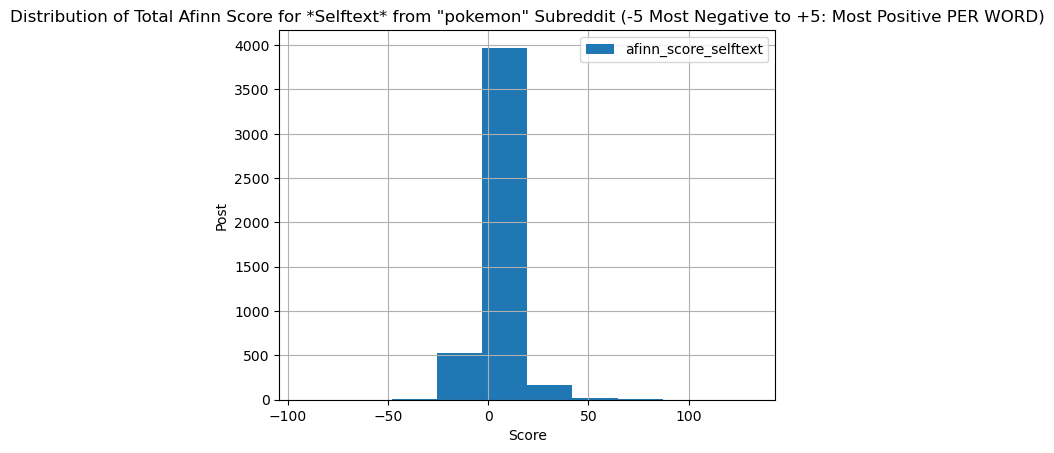

In [80]:
%matplotlib inline

ax = poke['afinn_score_selftext'].hist(legend = True);

# giving labels to x-axis and y-axis
ax.set(xlabel ='Score', ylabel ='Post')
  
# giving title to the plot
plt.title('Distribution of Total Afinn Score for *Selftext* from "pokemon" Subreddit (-5 Most Negative to +5: Most Positive PER WORD)');
;

''

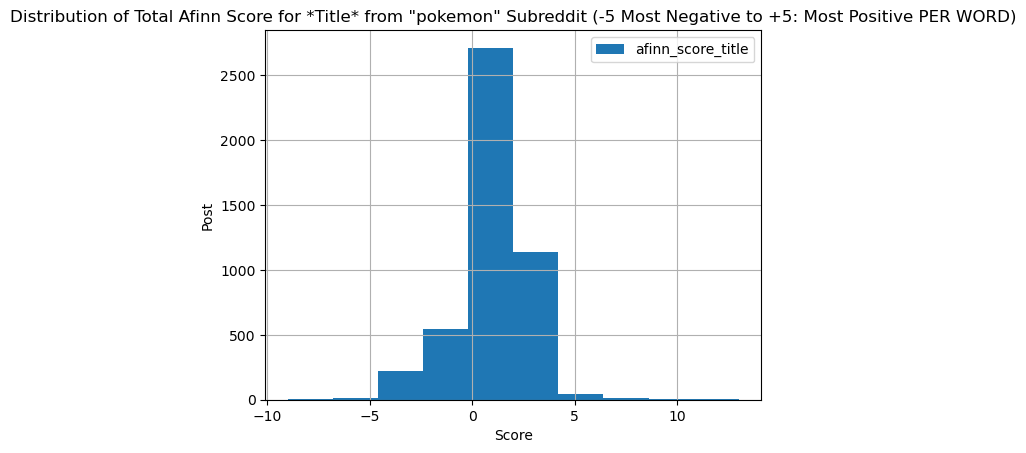

In [81]:
%matplotlib inline

ax = poke['afinn_score_title'].hist(legend = True);

# giving labels to x-axis and y-axis
ax.set(xlabel ='Score', ylabel ='Post')
  
# giving title to the plot
plt.title('Distribution of Total Afinn Score for *Title* from "pokemon" Subreddit (-5 Most Negative to +5: Most Positive PER WORD)');
;

---

# Sentiment Score for poketrade

# Displaying the poketrade['selftext] sentiment scores in columns

In [82]:
poke_trade['afinn_score_selftext'] = poke_trade['selftext'].apply(afinn.score)

In [83]:
columns_to_display = ['selftext', 'afinn_score_selftext']

poke_trade.sort_values(by='afinn_score_selftext')[columns_to_display].head(10)

,selftext,afinn_score_selftext
7972,[shiny]\n\nRiver is the last Shiny scatterbug ...,-59.0
5971,Hello! So I started playing in the fall after ...,-59.0
8651,[event] I’ve been going through some of my old...,-37.0
11207,[shiny] Offering up some shiny HA Tyrunts and ...,-33.0
11956,[6] - \n\nLooking For: \n\n* 6IV HP Fire Bulba...,-30.0
11516,"[shiny] Looing for anything, Just throw me an ...",-28.0
7061,Below is a list of pokemon with all required i...,-24.0
7893,"[comp] \n\nHi guys, through my journey with my...",-22.0
11596,[comp]\n\nLF:\n\nHA kricketot\n\nMeowth/techni...,-20.0
11933,"[6]\n\nHey guys, my boxes are nearly full, so ...",-20.0


In [84]:
#The Basic statistics for the sentiment analysis for poke['self_text']
poke_trade['afinn_score_selftext'].describe()

count    9215.000000
mean        5.661096
std        15.019959
min       -59.000000
25%         0.000000
50%         2.000000
75%         6.000000
max       335.000000
Name: afinn_score_selftext, dtype: float64

In [85]:
positive_counter = 0
negative_counter = 0
neutral_counter = 0

for i in poke_trade['afinn_score_selftext']:
    if i > 0:
        positive_counter += 1
    elif i == 0:
        neutral_counter += 1
    else:
        negative_counter += 1

print(f"The number of positive counter is: {positive_counter}")
print(f"The number of negative counter is: {negative_counter}")
print(f"The number of neutral counter is: {neutral_counter}")

The number of positive counter is: 6197
The number of negative counter is: 830
The number of neutral counter is: 2188


# The breakdown of  pokemontrade['seltext'] subreddit sentiment score
## Mean: 5.66
## Maximum: 335
## Minimum: -59
## Std: 15

## The number of positive counter is: 6197
## The number of negative counter is: 830
## The number of neutral counter is: 2188

---

### Displaying the poketrade['title'] sentiment scores in columns

In [86]:
poke_trade['afinn_score_title'] = poke_trade['title'].apply(afinn.score)

In [87]:
columns_to_display = ['title', 'afinn_score_title']

poke_trade.sort_values(by='afinn_score_title')[columns_to_display].tail(10)

,title,afinn_score_title
7336,LF: HA Arrokuda / Barraskewda ; FT: HA Sableye...,10.0
6493,"LF: Dream Ball Jangmo-o, Fast Ball Sizzlipede ...",11.0
8685,LF: non alolan HA vulpix. FT: 6iv jolly axew o...,11.0
2576,LF: Someone to help me complete the Galarian P...,11.0
3343,BDSPLF:life orb FT:chimchar [HA] FT:Gible [HA]...,13.0
10352,CompetitiveFT: (most are 5iv or I can breed fo...,14.0
7642,"LF: HA Skitty, FT 6IV moon ball Gengar, 6IV mo...",15.0
7521,"LF: Love Ball HA Ducklett, HA Popplio, Electri...",15.0
9672,LF: HA Bunnelby HA Jangmo-o and Psychic Fangs ...,16.0
4499,"LF: Fast Ball Shinx (HA preferred), Heavy Ball...",21.0


In [88]:
#The Basic statistics for the sentiment analysis for poke_trade['self_text']
poke_trade['afinn_score_title'].describe()

count    9215.000000
mean        0.763321
std         1.665050
min       -12.000000
25%         0.000000
50%         0.000000
75%         2.000000
max        21.000000
Name: afinn_score_title, dtype: float64

In [89]:
print(poke_trade.loc[1039, 'title'])

A dumb deal I’m offering for Shield players that you should only consider if you’re an idiot


In [90]:
print(poke_trade.loc[4499, 'title'])

LF: Fast Ball Shinx (HA preferred), Heavy Ball ///////// FT Aprimon: Moon HA Piplup, Lure Piplup, Love HA Torchic, Friend HA Turtwig, Heavy HA Gligar, Heavy Beldum, Moon HA Murkrow, Lure HA Totodile, Level 5IV HA Gible, Friend Larvitar, and MORE IN POST


## Total Count of Positive / Negative / Neutral in poketrade['title]

In [91]:
positive_counter = 0
negative_counter = 0
neutral_counter = 0

for i in poke_trade['afinn_score_title']:
    if i > 0:
        positive_counter += 1
    elif i == 0:
        neutral_counter += 1
    else:
        negative_counter += 1

print(f"The number of positive counter is: {positive_counter}")
print(f"The number of negative counter is: {negative_counter}")
print(f"The number of neutral counter is: {neutral_counter}")

The number of positive counter is: 2698
The number of negative counter is: 312
The number of neutral counter is: 6205


# The breakdown of pokemontrade['title'] subreddit sentiment score
## Mean: 0.76
## Maximum: 21
## Minimum: -12
## Std: 1.665

## The number of positive counter is: 2698
## The number of negative counter is: 312
## The number of neutral counter is: 6205

---

# Visualiation of Afinn score in poketrade['selftext'] + ['title']

''

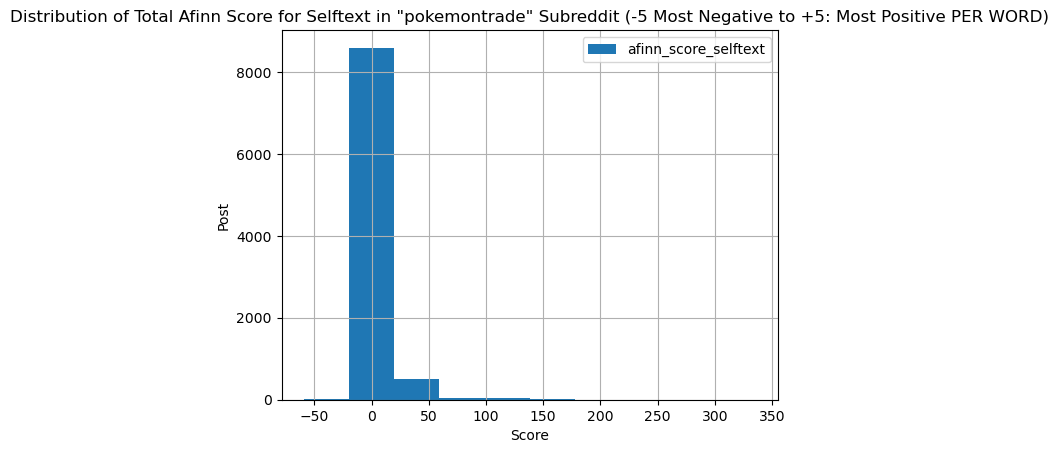

In [92]:
%matplotlib inline

ax = poke_trade['afinn_score_selftext'].hist(legend = True)

# giving labels to x-axis and y-axis
ax.set(xlabel ='Score', ylabel ='Post')
  
# giving title to the plot
plt.title('Distribution of Total Afinn Score for Selftext in "pokemontrade" Subreddit (-5 Most Negative to +5: Most Positive PER WORD)');
;

''

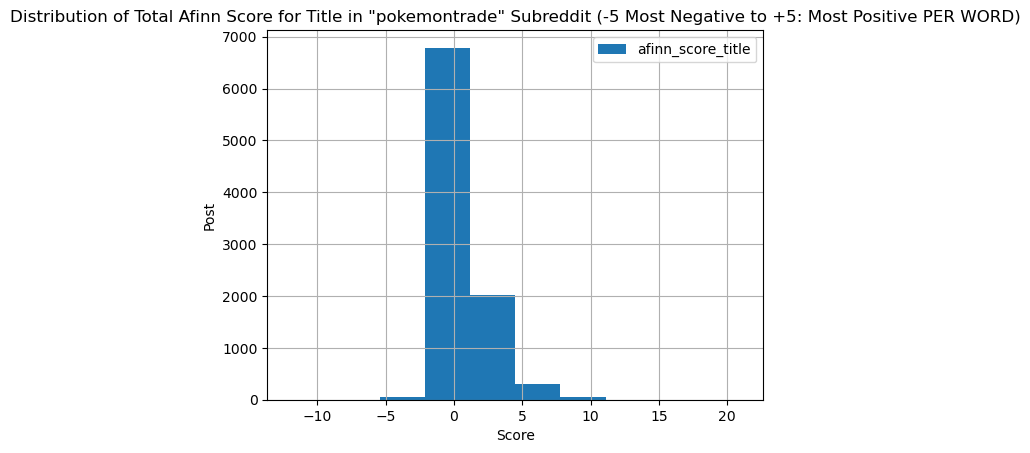

In [93]:
%matplotlib inline

ax = poke_trade['afinn_score_title'].hist(legend = True)

# giving labels to x-axis and y-axis
ax.set(xlabel ='Score', ylabel ='Post')
  
# giving title to the plot
plt.title('Distribution of Total Afinn Score for Title in "pokemontrade" Subreddit (-5 Most Negative to +5: Most Positive PER WORD)');
;

---

# SentimentIntensityAnalyzer

In [94]:
#pip install vaderSentiment

In [95]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [96]:
analyzer = SentimentIntensityAnalyzer()

# PokemonTrade (Title) + (Selftext) Polarity Score

In [97]:
analyzer.polarity_scores(str(poke_trade_text['title']))

{'neg': 0.0, 'neu': 0.898, 'pos': 0.102, 'compound': 0.8481}

In [98]:
analyzer.polarity_scores(str(poke_trade_text['selftext']))

{'neg': 0.014, 'neu': 0.881, 'pos': 0.105, 'compound': 0.8903}

# Pokemon(Title) + (Selftext) Polarity Score

In [99]:
analyzer.polarity_scores(str(poke_text['title']))

{'neg': 0.054, 'neu': 0.906, 'pos': 0.041, 'compound': 0.1205}

In [100]:
analyzer.polarity_scores(str(poke_text['selftext']))

{'neg': 0.056, 'neu': 0.906, 'pos': 0.039, 'compound': -0.4546}

# 4a) The most frequent words - Word Cloud for 'pokemon' ['selftext']

In [101]:
#pip install wordcloud

In [102]:
#conda install -c conda-forge wordcloud

In [103]:
import nltk
from wordcloud import WordCloud, STOPWORDS

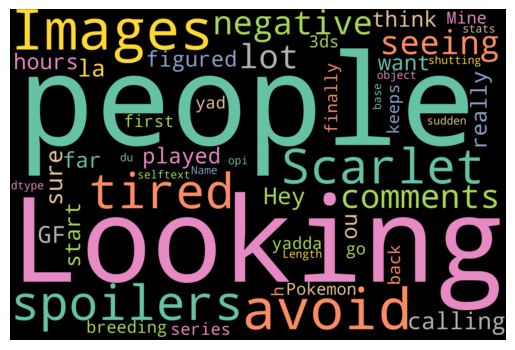

In [104]:
text = str(poke['selftext'])
# Generate a word cloud image
stopwords = set(STOPWORDS)
# Generate a word cloud image
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='black', colormap='Set2', stopwords = STOPWORDS).generate(text)
# Display the generated image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# 4b) Word Cloud for 'pokemon' ['title']

In [105]:
from PIL import Image

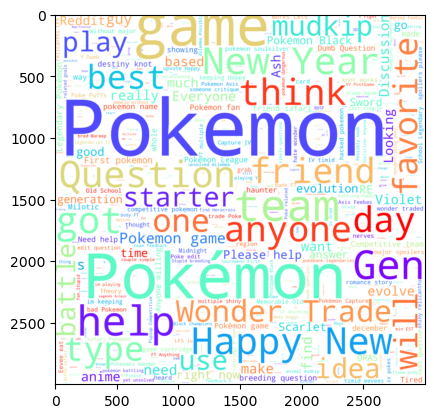

In [110]:
# Generate a word cloud image

text = str(poke['title'])

stopwords = set(STOPWORDS)
mask = np.array(Image.open("Pokemon-Dragonite-Silhouette-Stencil-thumb.jpeg"))
wordcloud = WordCloud(width = 3000, height = 3000, random_state=1, stopwords=stopwords, background_color="white", max_words=500, colormap='rainbow').generate(' '.join(poke['title']))
# create twitter image
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("on")
# store to file
#plt.savefig("wordcloud.png", format="png")s
plt.show()

# 4c) A Word Cloud generated from both title + selftext

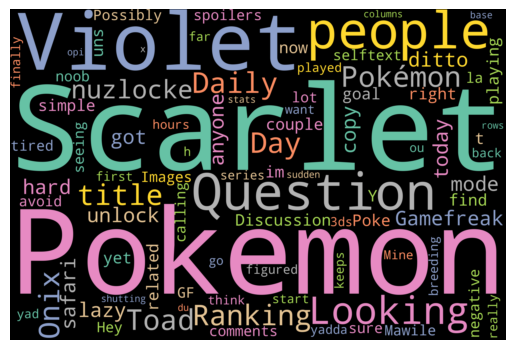

In [107]:
text = str(poke_text)
# Generate a word cloud image
stopwords = set(STOPWORDS)
# Generate a word cloud image
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='black', colormap='Set2', stopwords = STOPWORDS).generate(text)
# Display the generated image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# 4c) Word Cloud for 'pokemontrade' ['title']

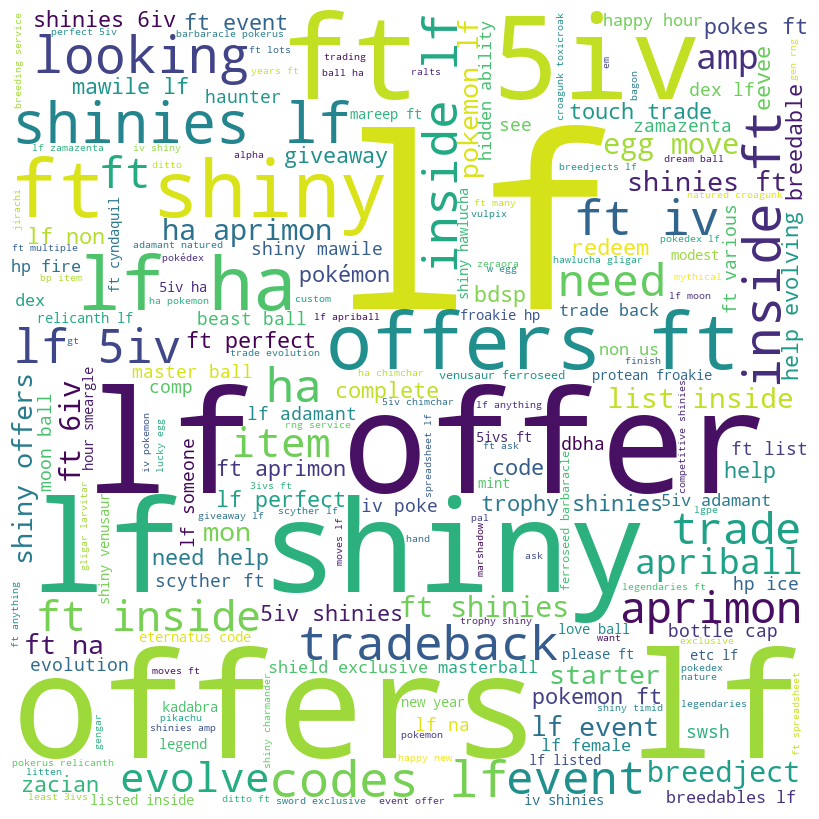

In [108]:
#Word Cloud for subreddit 'pokemon' ['title']

comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in poke_trade['title']:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

# 4d) Word Cloud for 'pokemontrade' ['selftext']

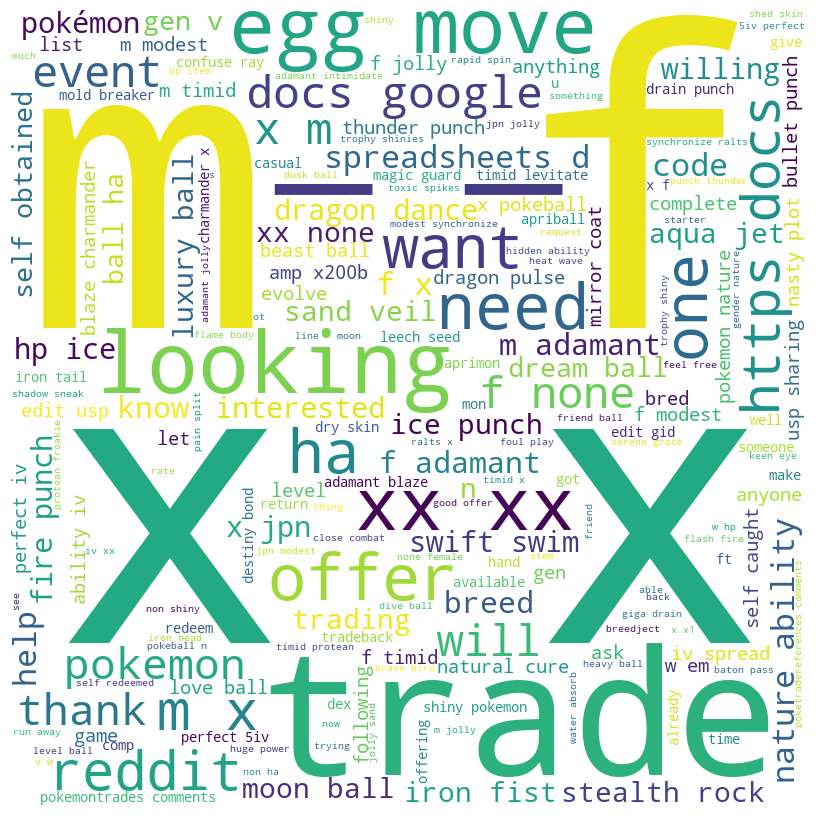

In [112]:
#Word Cloud for subreddit 'pokemon' ['selftext']

comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in poke_trade['selftext']:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

# Conclusion / Recommendation

### A) To better automate the categorization process for better sub-topic organization for a big forum like Reddit, we can we distinguish posts that have the following buzzwords:
## <font color='red'> For 'pokemon' subreddit:</font>
### <font color='red'>Keywords are more likely to be generic. Usually it involves some 'conversational starters', 'greetings' as well as some 'personal opinions' on their favorite pokemons or generations. </font>

<font color='red'>'Happy New year', 'hello', 'hey guys', 'friend', 'pokemon', 'game', 'day', 'favorite', 'gen', 'thought', 'wonder trade'</font>

## <font color='green'>For'pokemontrades' subreddit:</font>
### <font color='green'>Keywords tend to be more specific. Usually, it has to deal with the pokemon's type/personaility/special ability and particular move sets, and whether they are shiny pokemons or not:</font>

<font color='green'>'egg', 'move', 'shiny','adament', 'adament', 'timid', 'levitate', 'mirror coat', 'events', 'trading', 'dream ball', 'beast ball', 'looking, 'offers', 'If', 'evolve', '6iv', 'egg moves'</font>
<font color='green'>'LF' (Looking For),  'FT' (For Trade) (The most crucial differentiators)
    

### B) The major concerns of 'pokemontrade' and 'pokemon' resulted in subtle differences:
Pokemontrade subreddit users usually care about about their own mastery of the pokedex, or own pursuits of shiny collections, which tends to be more practical. While for pokemon subreddit users are looking for extending their game network by casual greeting; exchanging friend codes; opinions about different generations and; new game features such as 'Wonder Trade'. 

According to the sentiment analysis, while both subreddits resulted in net positive sentiment scores, pokemontrade tends to indicate higher satisfactory rate and positive emotions. Whereas 'pokemon' subreddit serves as a more generic discussion forum for users to express their opinions. Sometimes, the opinion could be good or bad, depending on the users' experiences. For example, the recent Scarlett/ Violet series was critcised negatively by some for its awful technical aspects, where  the game visual elements were often misplaced and dislocated. On the contrary, 'pokemontrade' seems like more a vibrant, energetic, wishful place where users can throw their wishes out and have them fulfilled accordingly. 

### C) The heated topics that are discussed among the users in both 'pokemon' and 'pokemontrade' subreddits

 For 'pokemon' subreddit, the most heated discussion topics are probably violet and scarlett, for example, some legendary/special pokemons that are only exclusive to the generation, as well as some general Q&A, opinion seeking related to the game.
 
 For 'pokemontrade' subreddit, the most heated discussion topics seem to be shiny, rare high IV, personality traits / ability pokemons, which people are seeking most of the time.

### D) The influencers who have the most subscribers

For pokemon market campaigners, they might want to contact the following users to promote their pokemon franchise, as they might have the highest commitment and engagement with subreddit with high quality content:

**'pokemontrade' subreddit:**
</br>
Top users with highest subscribers:


</br>
-Shiny_Star-            11807228.0
</br>
Porygon-Bot             10919769.0
</br>
Theduskwolf              8195275.0
</br>
chenj25                  7680800.0
</br>
hoozayisdead             4543350.0
</br>
MrNoobyy                 4288371.0
</br>
ShaikhAndBake            4091363.0
</br>
enlightened_pogo         3900208.0
</br>
Joedemigod4              3739681.0
</br>
Stanley232323            3678110.0
</br>
FALLGUYS627              3432610.0
</br>
Vanhuie                  3220982.0
</br>
TheGoat1210              3215538.0
</br>
firebird5225             2874154.0
</br>
MrShinobi96              2689109.0
</br>
Beneficial-Gear-7626     2686867.0
</br>
Mikozeki                 2685718.0
</br>
Meowriisa                2685205.0
</br>
rtgreen                  2683799.0
</br>
bwo0                     2618802.0
Name: subreddit_subscribers, dtype

**For 'pokemon' subreddit:**
</br>
Top users with highest subscribers:

</br>
EmiKoizuwumi            46068387.0
</br>
cshin09                 37484929.0
</br>
Blueeyeswhiteraichu     24890233.0
</br>
Poll_God                18683148.0
</br>
Bluecomments            16586987.0
</br>
PokeUpdateBot           16278226.0
</br>
AnonymousAzrael         16221707.0
</br>
LightBuzzyear69         15946605.0
</br>
ChrisPChicken04         15046609.0
</br>
EveningChocolate1028    14817777.0
</br>
SnowPhoenix9999         12800880.0
</br>
Under_Master_85         12598236.0
</br>
arthurcdemari           12597202.0
</br>
ChattyBird4Eva          12322406.0
</br>
blaahguy                12296105.0
</br>
wuzhere-75              12272536.0
</br>
Money-Lie7814           12246180.0
</br>
Key_Structure_2070      12242807.0
</br>
NoEnd9111               12056990.0
</br>
Nyuu222                 11885675.0


### E) Whether adults are the majority of the users in these forums

It turns out the kids or people under 18 are the majority accounted for these two subreddit users.

While only a small minority of adults (>10) were engaging in the 'pokemon' subreddit, more adults are engaging with the 'pokemontrade' subreddit instead. This reflects adults focus more on the practicality and unlocking achievements of the game, while kids spend more time in exchanging thoughts and extending network. 


### F) Subreddit Engagement by Word Count
According to the post count, 'pokemontrade' subreddit has significant a larger number of word count compared to 'pokemon'. It is almost double of what 'pokemon' subreddit has, implicating a higher user engagement rate overall. 